### **Context**

UK police forces collect data on every vehicle collision in the uk on a form called Stats19. Data from this form ends up at the DfT and is published at https://data.gov.uk/dataset/road-accidents-safety-data

### **Content**

There are 3 CSVs in this set. Accidents is the primary one and has references by Accident_Index to the casualties and vehicles tables. This might be better done as a database.

### **Inspiration**

Questions to ask of this data -

combined with population data, how do different areas compare?
* what trends are there for accidents involving different road users eg motorcycles, peds, cyclists
* are road safety campaigns effective?
* likelihood of accidents for different groups / vehicles
* many more..

### **Manifest**

dft05-15.tgz - tar of Accidents0515.csv, Casualties0515.csv and Vehicles0515.csv
tidydata.sh - script to get and tidy data.

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
print("Imported")

Imported


In [10]:
sns.set_theme()

In [11]:
Accidents = pd.read_csv('../input/dft-accident-data/Accidents0515.csv',index_col='Accident_Index')
Casualities = pd.read_csv('../input/dft-accident-data/Casualties0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
Vehicles = pd.read_csv('../input/dft-accident-data/Vehicles0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
print('Datasets Imported')

Datasets Imported


### **ACCIDENTS**

In [12]:
Accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [13]:
print("Number of rows present in a dataset    :{}".format(Accidents.shape[0]))
print("Number of columns present in a dataset :{}".format(Accidents.shape[1]))

Number of rows present in a dataset    :1780653
Number of columns present in a dataset :31


In [14]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780653 entries, 200501BS00001 to 2015984141415
Data columns (total 31 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Location_Easting_OSGR                        float64
 1   Location_Northing_OSGR                       float64
 2   Longitude                                    float64
 3   Latitude                                     float64
 4   Police_Force                                 int64  
 5   Accident_Severity                            int64  
 6   Number_of_Vehicles                           int64  
 7   Number_of_Casualties                         int64  
 8   Date                                         object 
 9   Day_of_Week                                  int64  
 10  Time                                         object 
 11  Local_Authority_(District)                   int64  
 12  Local_Authority_(Highway)                    object 
 13 

In [15]:
Accidents["Date"] = Accidents["Date"].astype("datetime64[ns]")
Accidents["Day"] = Accidents["Date"].dt.day
Accidents["Month"] = Accidents["Date"].dt.month
Accidents["Year"] = Accidents["Date"].dt.year

In [16]:
Accidents["Time"] = Accidents["Time"].astype("datetime64[ns]")

In [17]:
Accidents.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Day', 'Month', 'Year'],
      dtype='object')

In [18]:
Accidents.isnull().sum()

Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

In [19]:
Accidents[Accidents.isna().any(axis=1)]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Day,Month,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS70010,526940.0,177460.0,-0.173312,51.481804,1,3,2,1,2005-06-02,1,...,1,1,0,0,1,1,NaN,2,6,2005
200501CP00011,533630.0,180150.0,-0.076006,51.504439,48,3,3,1,2005-01-18,3,...,2,2,0,0,1,1,NaN,18,1,2005
200501CP00089,532820.0,180570.0,-0.087512,51.508404,48,3,1,1,2005-04-15,6,...,2,2,0,0,1,1,NaN,15,4,2005
200501CP00098,531650.0,180710.0,-0.104309,51.509935,48,3,2,1,2005-05-31,3,...,1,1,0,0,1,1,NaN,31,5,2005
200501CP00147,532820.0,180600.0,-0.087501,51.508673,48,3,2,1,2005-07-19,3,...,1,1,0,2,1,1,NaN,19,7,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,2015-11-12,6,...,1,2,0,0,2,1,NaN,12,11,2015
2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,2015-02-12,4,...,1,2,0,0,2,1,NaN,12,2,2015
2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,2015-12-23,4,...,4,2,0,0,2,1,NaN,23,12,2015


In [20]:
Accidents.drop("LSOA_of_Accident_Location",axis=1,inplace = True)
Accidents.dropna(inplace=True)

In [21]:
Accidents.duplicated().sum()

32

In [22]:
Accidents.drop_duplicates(inplace=True)

In [23]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780332 entries, 200501BS00001 to 2015984141415
Data columns (total 33 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Location_Easting_OSGR                        float64       
 1   Location_Northing_OSGR                       float64       
 2   Longitude                                    float64       
 3   Latitude                                     float64       
 4   Police_Force                                 int64         
 5   Accident_Severity                            int64         
 6   Number_of_Vehicles                           int64         
 7   Number_of_Casualties                         int64         
 8   Date                                         datetime64[ns]
 9   Day_of_Week                                  int64         
 10  Time                                         datetime64[ns]
 11  Local_Authority_(Distric

In [24]:
Accidents.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [25]:
Accidents.duplicated().sum()

0

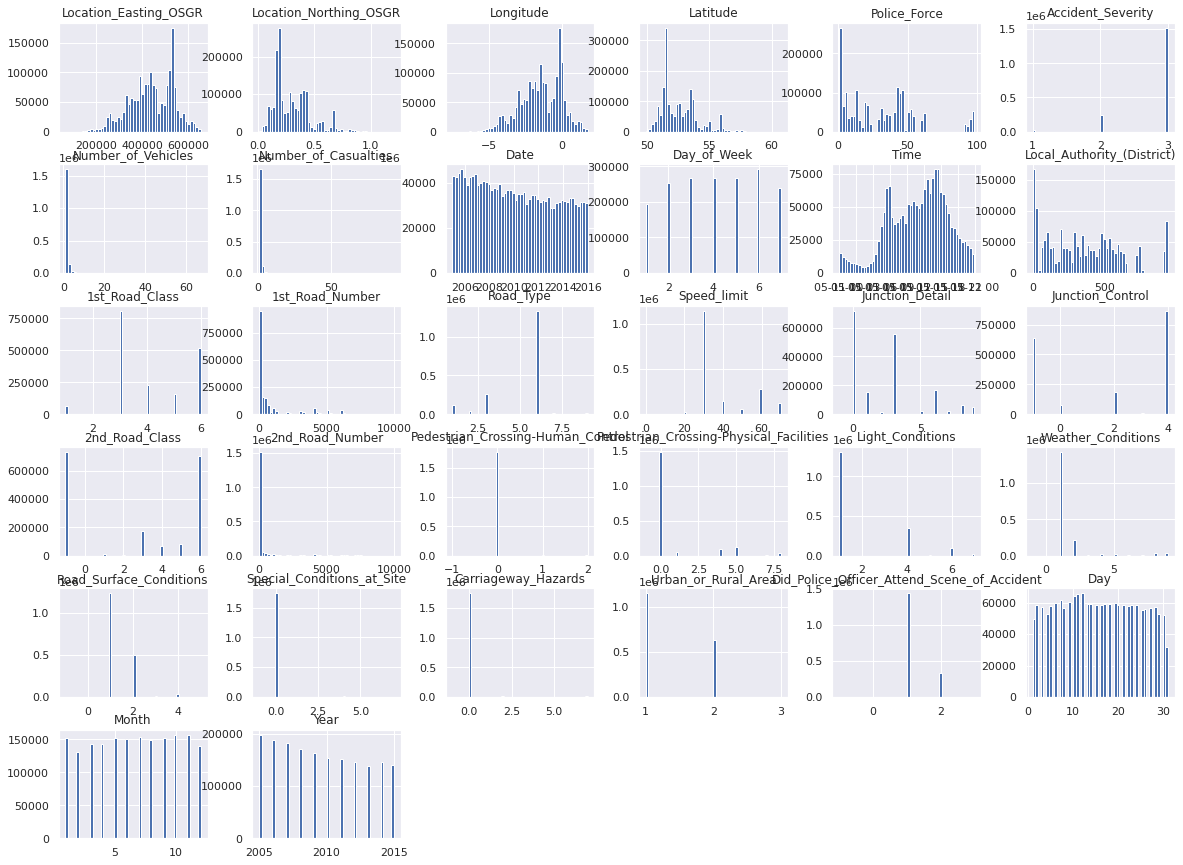

In [26]:
Accidents.hist(bins = 50, figsize = (20,15))
plt.show()

In [27]:
print("Number of rows present in a dataset after preprocessing     :{}".format(Accidents.shape[0]))
print("Number of columns present in a dataset after preprocessing  :{}".format(Accidents.shape[1]))

Number of rows present in a dataset after preprocessing     :1780332
Number of columns present in a dataset after preprocessing  :33


In [28]:
Accidents.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Day,Month,Year
Location_Easting_OSGR,1.000000,-0.417593,0.999354,-0.419518,-0.365644,0.016799,0.018613,-0.039203,-0.002488,-0.389453,...,0.007767,-0.029134,-0.071570,-0.014959,-0.006421,-0.096196,0.008198,0.000693,0.004999,0.043775
Location_Northing_OSGR,-0.417593,1.000000,-0.428448,0.999973,0.179304,-0.032706,-0.041635,0.030423,0.004009,0.130907,...,0.004855,0.020146,0.082463,0.015538,0.012386,0.051834,-0.011505,-0.001557,-0.002178,-0.026170
Longitude,0.999354,-0.428448,1.000000,-0.430270,-0.379156,0.017288,0.019898,-0.037927,-0.002495,-0.399736,...,0.007405,-0.029155,-0.072333,-0.015121,-0.006880,-0.094574,0.008694,0.000625,0.004974,0.043368
Latitude,-0.419518,0.999973,-0.430270,1.000000,0.177211,-0.032674,-0.041419,0.030578,0.004007,0.129150,...,0.004841,0.020076,0.082361,0.015480,0.012264,0.051324,-0.011330,-0.001569,-0.002196,-0.026310
Police_Force,-0.365644,0.179304,-0.379156,0.177211,1.000000,-0.036066,-0.016415,0.006282,0.000265,0.981562,...,0.019553,0.047121,0.081595,0.024290,0.028725,0.240243,-0.013613,0.001802,0.000350,-0.016367
Accident_Severity,0.016799,-0.032706,0.017288,-0.032674,-0.036066,1.000000,0.074938,-0.084119,0.002551,-0.036668,...,-0.063296,0.021656,0.009427,0.001847,-0.000638,-0.083939,0.115552,-0.001602,-0.001847,-0.005101
Number_of_Vehicles,0.018613,-0.041635,0.019898,-0.041419,-0.016415,0.074938,1.000000,0.237072,-0.000194,-0.011358,...,-0.084358,-0.020933,-0.041603,-0.011089,-0.045288,0.040489,-0.032011,0.002786,0.001504,-0.003992
Number_of_Casualties,-0.039203,0.030423,-0.037927,0.030578,0.006282,-0.084119,0.237072,1.000000,-0.000943,0.013598,...,0.036752,-0.004552,0.028256,0.012394,0.003283,0.115846,-0.105527,0.006258,0.001430,-0.015816
Day_of_Week,-0.002488,0.004009,-0.002495,0.004007,0.000265,0.002551,-0.000194,-0.000943,1.000000,0.000175,...,0.007989,-0.001596,-0.011017,-0.003161,-0.003721,-0.016750,0.004015,0.003111,0.000512,-0.004164
Local_Authority_(District),-0.389453,0.130907,-0.399736,0.129150,0.981562,-0.036668,-0.011358,0.013598,0.000175,1.000000,...,0.017943,0.049614,0.081096,0.024752,0.028429,0.253254,-0.009915,0.001462,0.000373,-0.019526


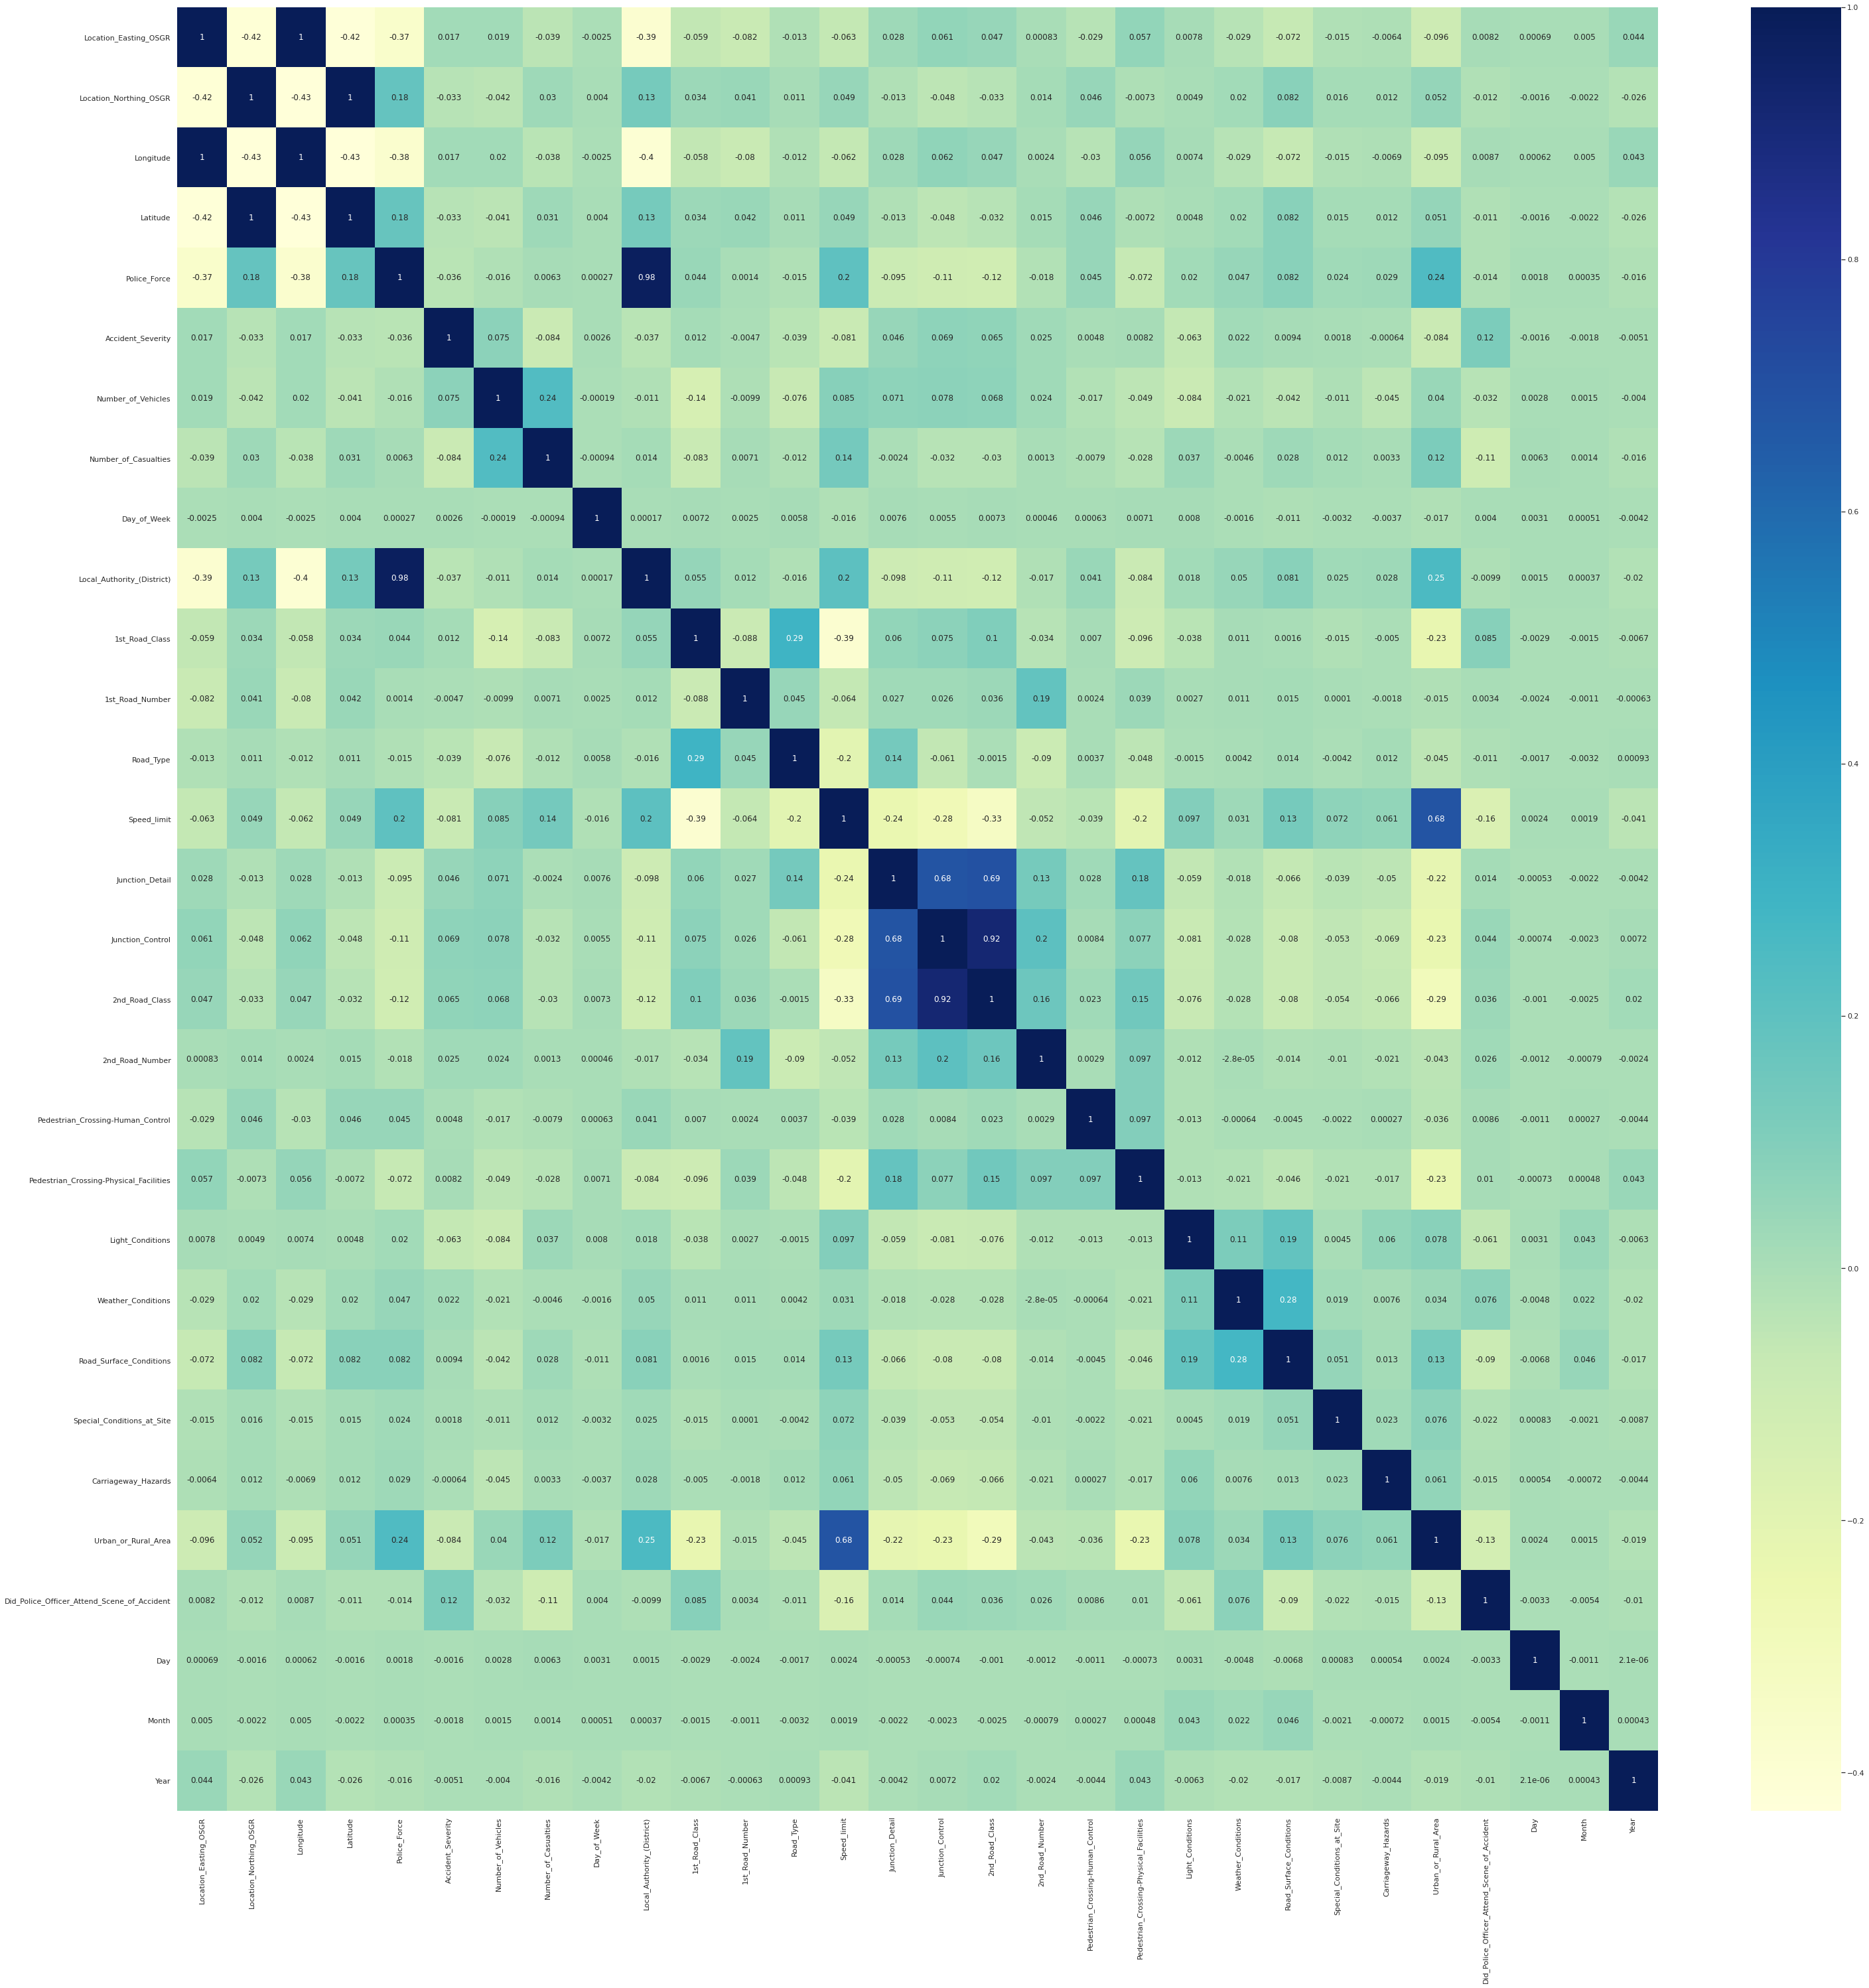

In [29]:
plt.figure(figsize = (50,50))
sns.heatmap(data = Accidents.corr(),annot = True, cmap = "YlGnBu")
plt.show()

### **CASUALITIES**

In [30]:
Casualities.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [31]:
print("Number of rows present in a dataset    :{}".format(Casualities.shape[0]))
print("Number of columns present in a dataset :{}".format(Casualities.shape[1]))

Number of rows present in a dataset    :2216720
Number of columns present in a dataset :14


In [32]:
Casualities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216720 entries, 200501BS00001 to 2014984139614
Data columns (total 14 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Vehicle_Reference                   int64
 1   Casualty_Reference                  int64
 2   Casualty_Class                      int64
 3   Sex_of_Casualty                     int64
 4   Age_of_Casualty                     int64
 5   Age_Band_of_Casualty                int64
 6   Casualty_Severity                   int64
 7   Pedestrian_Location                 int64
 8   Pedestrian_Movement                 int64
 9   Car_Passenger                       int64
 10  Bus_or_Coach_Passenger              int64
 11  Pedestrian_Road_Maintenance_Worker  int64
 12  Casualty_Type                       int64
 13  Casualty_Home_Area_Type             int64
dtypes: int64(14)
memory usage: 253.7+ MB


In [33]:
Casualities.isnull().sum()

Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

In [34]:
Casualities.duplicated().sum()

1977838

In [35]:
Casualities.drop_duplicates(inplace=True)

In [36]:
Casualities.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,238882.000000,238882.000000,238882.000000,238882.000000,238882.000000,238882.000000,238882.000000,238882.000000,238882.000000,238882.000000,238882.00000,238882.000000,238882.000000,238882.000000
mean,1.641375,2.277463,1.989664,1.446693,39.372904,6.482632,2.646407,1.655031,1.322586,0.404714,0.29739,-0.488015,8.794455,0.954459
std,1.229549,3.655152,0.762326,0.507106,23.093014,2.829481,0.576788,3.007854,2.672757,0.711889,1.00570,0.698864,14.289177,1.309492
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,21.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,0.000000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,37.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,9.000000,1.000000
75%,2.000000,3.000000,3.000000,2.000000,56.000000,9.000000,3.000000,1.000000,1.000000,1.000000,0.00000,0.000000,9.000000,2.000000
max,91.000000,852.000000,3.000000,2.000000,103.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.00000,2.000000,98.000000,3.000000


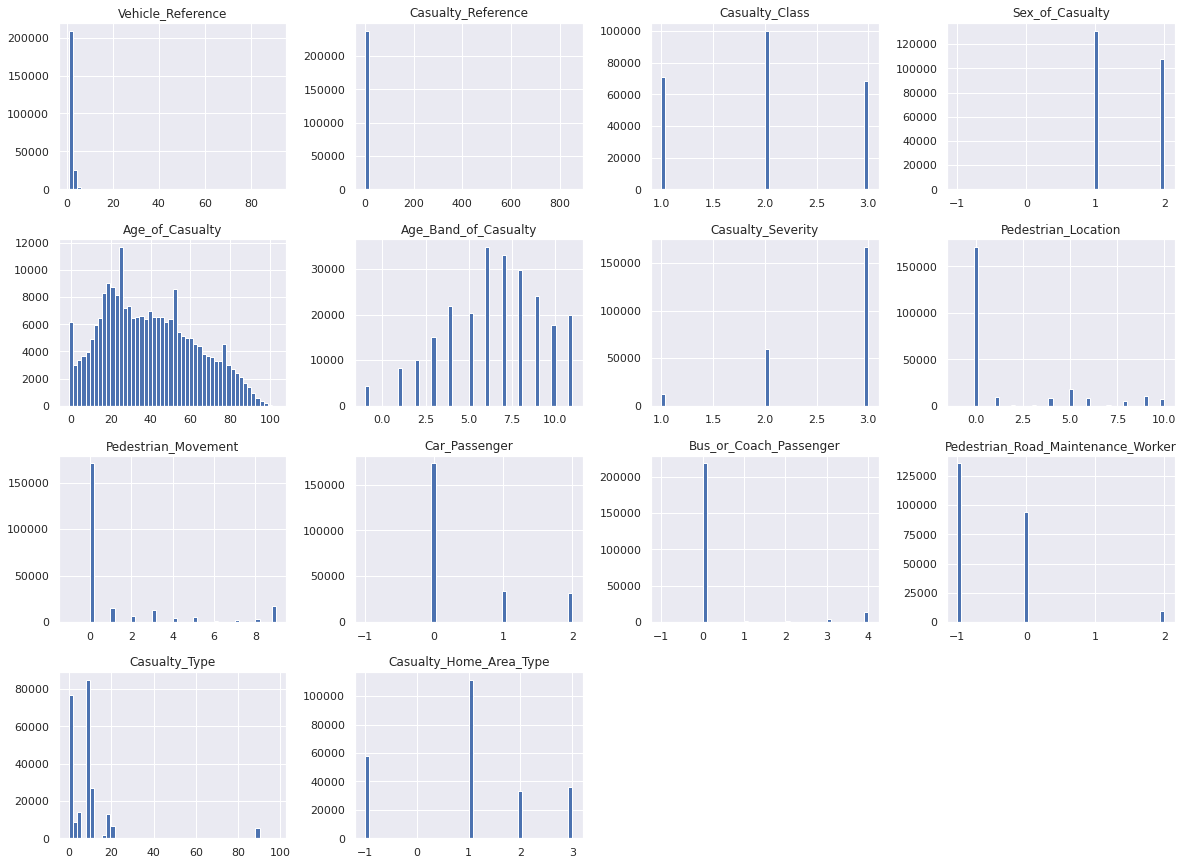

In [37]:
Casualities.hist(bins = 50, figsize = (20,15))
plt.show()

In [38]:
print("Number of rows present in a dataset after preprocessing     :{}".format(Casualities.shape[0]))
print("Number of columns present in a dataset after preprocessing  :{}".format(Casualities.shape[1]))

Number of rows present in a dataset after preprocessing     :238882
Number of columns present in a dataset after preprocessing  :14


In [39]:
Casualities.corr()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Vehicle_Reference,1.000000,0.209576,-0.308809,-0.009972,-0.013711,0.001620,0.110831,-0.250758,-0.222167,0.087471,-0.032587,-0.071593,0.081742,0.023279
Casualty_Reference,0.209576,1.000000,-0.055483,0.023110,-0.084771,-0.084003,0.094314,-0.152176,-0.129421,0.116110,0.266414,-0.042220,0.043658,-0.011173
Casualty_Class,-0.308809,-0.055483,1.000000,0.104107,-0.072242,-0.101857,-0.000286,0.729249,0.655830,0.007669,0.004009,0.171475,-0.333635,-0.112366
Sex_of_Casualty,-0.009972,0.023110,0.104107,1.000000,0.049072,0.038872,0.047285,-0.005334,-0.001051,0.099576,0.082809,0.004484,-0.045646,0.010279
Age_of_Casualty,-0.013711,-0.084771,-0.072242,0.049072,1.000000,0.971222,-0.080487,-0.011821,-0.008003,-0.099218,0.005997,0.005627,0.018209,0.037442
Age_Band_of_Casualty,0.001620,-0.084003,-0.101857,0.038872,0.971222,1.000000,-0.080067,-0.025138,-0.017675,-0.107578,-0.010049,0.004249,0.027135,0.042882
Casualty_Severity,0.110831,0.094314,-0.000286,0.047285,-0.080487,-0.080067,1.000000,-0.063913,-0.048922,0.070591,0.124058,0.019678,0.083788,-0.007941
Pedestrian_Location,-0.250758,-0.152176,0.729249,-0.005334,-0.011821,-0.025138,-0.063913,1.000000,0.819908,-0.312815,-0.162708,0.155877,-0.338651,-0.050135
Pedestrian_Movement,-0.222167,-0.129421,0.655830,-0.001051,-0.008003,-0.017675,-0.048922,0.819908,1.000000,-0.281321,-0.146327,0.142288,-0.304557,-0.042839
Car_Passenger,0.087471,0.116110,0.007669,0.099576,-0.099218,-0.107578,0.070591,-0.312815,-0.281321,1.000000,-0.118498,-0.091001,0.077155,-0.002726


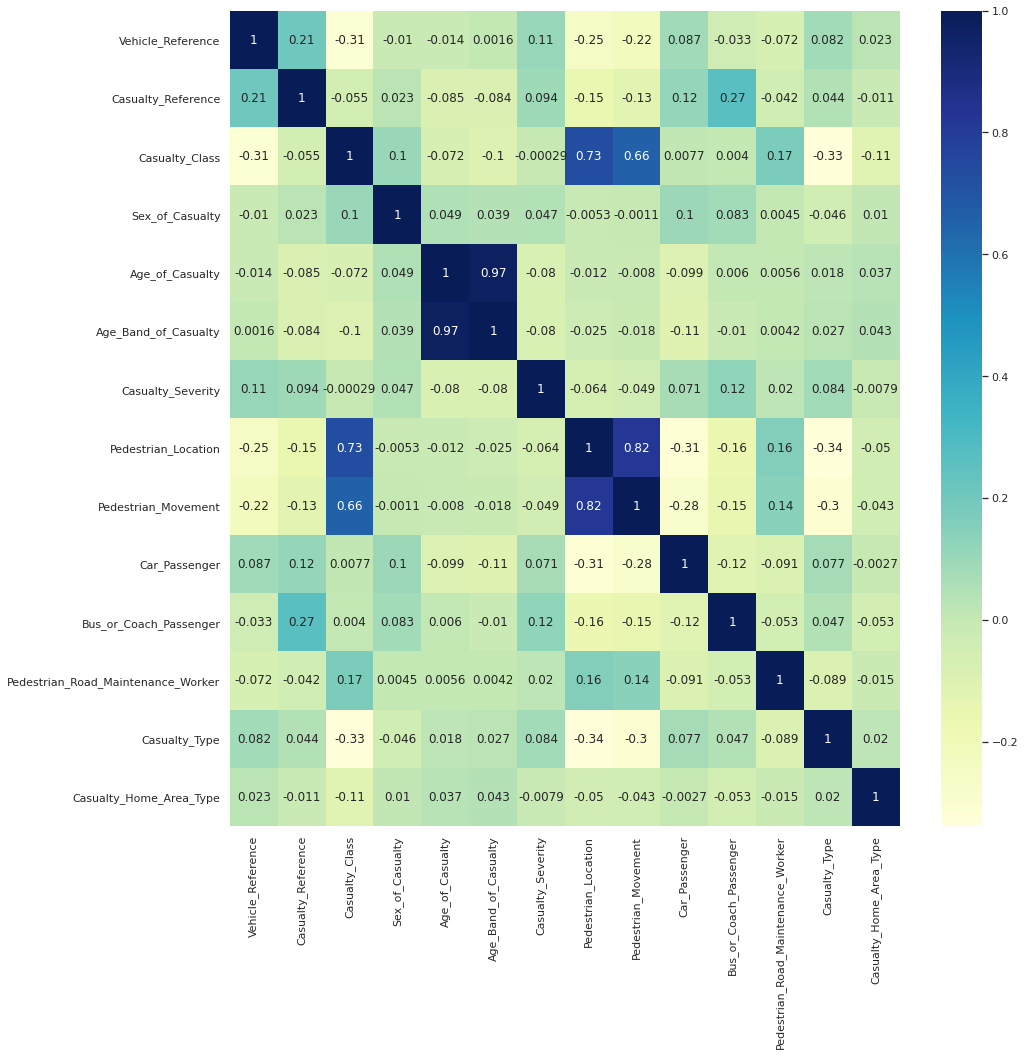

In [40]:
plt.figure(figsize = (15,15))
sns.heatmap(data = Casualities.corr(),annot = True, cmap = "YlGnBu")
plt.show()

#### **VEHICLES**

In [41]:
Vehicles.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [42]:
print("Number of rows present in a dataset    :{}".format(Vehicles.shape[0]))
print("Number of columns present in a dataset :{}".format(Vehicles.shape[1]))

Number of rows present in a dataset    :3004425
Number of columns present in a dataset :21


In [43]:
list(Vehicles.columns)

['Vehicle_Reference',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Was_Vehicle_Left_Hand_Drive?',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Engine_Capacity_(CC)',
 'Propulsion_Code',
 'Age_of_Vehicle',
 'Driver_IMD_Decile',
 'Driver_Home_Area_Type']

In [44]:
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype
---  ------                            -----
 0   Vehicle_Reference                 int64
 1   Vehicle_Type                      int64
 2   Towing_and_Articulation           int64
 3   Vehicle_Manoeuvre                 int64
 4   Vehicle_Location-Restricted_Lane  int64
 5   Junction_Location                 int64
 6   Skidding_and_Overturning          int64
 7   Hit_Object_in_Carriageway         int64
 8   Vehicle_Leaving_Carriageway       int64
 9   Hit_Object_off_Carriageway        int64
 10  1st_Point_of_Impact               int64
 11  Was_Vehicle_Left_Hand_Drive?      int64
 12  Journey_Purpose_of_Driver         int64
 13  Sex_of_Driver                     int64
 14  Age_of_Driver                     int64
 15  Age_Band_of_Driver                int64
 16  Engine_Capacity_(CC)              int64
 17  Propulsion_Cod

In [45]:
Vehicles.isnull().sum()

Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
dtype: int64

In [46]:
Vehicles.duplicated().sum()

247482

In [47]:
Vehicles.drop_duplicates(inplace = True)

In [48]:
Vehicles.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
count,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,...,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06,2.756943e+06
mean,1.557162e+00,9.690421e+00,3.247038e-02,1.255231e+01,1.379191e-01,2.521540e+00,2.320418e-01,3.302063e-01,4.070679e-01,6.229197e-01,...,9.877223e-01,8.531708e+00,1.355943e+00,3.623800e+01,6.202190e+00,1.530096e+03,8.967585e-01,5.323466e+00,3.832461e+00,9.943880e-01
std,7.746169e-01,8.074507e+00,3.159042e-01,6.181315e+00,1.002964e+00,3.143875e+00,7.431005e-01,1.668347e+00,1.447300e+00,2.187478e+00,...,1.903298e-01,6.017957e+00,5.330891e-01,1.833884e+01,2.582511e+00,1.712139e+03,1.081534e+00,5.266684e+00,3.682574e+00,1.056019e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.000000e+00,9.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,1.000000e+00,2.400000e+01,5.000000e+00,6.450000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,9.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,6.000000e+00,1.000000e+00,3.500000e+01,6.000000e+00,1.398000e+03,1.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00
75%,2.000000e+00,9.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.500000e+01,2.000000e+00,4.800000e+01,8.000000e+00,1.905000e+03,2.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00
max,9.100000e+01,9.800000e+01,5.000000e+00,1.800000e+01,9.000000e+00,8.000000e+00,5.000000e+00,1.200000e+01,8.000000e+00,1.100000e+01,...,2.000000e+00,1.500000e+01,3.000000e+00,1.000000e+02,1.100000e+01,9.999900e+04,1.200000e+01,1.110000e+02,1.000000e+01,3.000000e+00


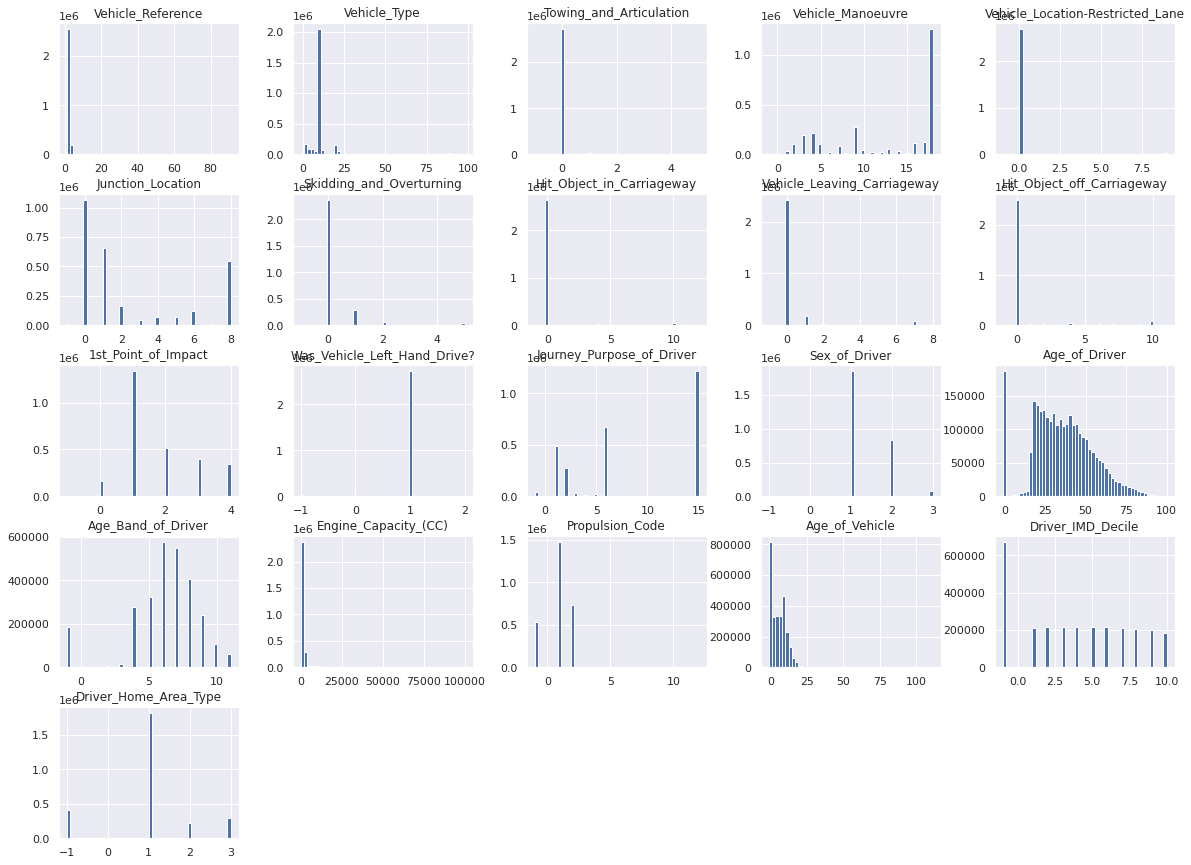

In [49]:
Vehicles.hist(bins = 50, figsize = (20,15))
plt.show()

In [50]:
print("Number of rows present in a dataset after preprocessing     :{}".format(Vehicles.shape[0]))
print("Number of columns present in a dataset after preprocessing  :{}".format(Vehicles.shape[1]))

Number of rows present in a dataset after preprocessing     :2756943
Number of columns present in a dataset after preprocessing  :21


In [51]:
Vehicles.corr()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Vehicle_Reference,1.000000,0.001879,0.002989,-0.102302,-0.008355,-0.050039,-0.105332,-0.069903,-0.107878,-0.117592,...,-0.004196,0.008750,0.053310,-0.014543,-0.032427,-0.009454,-0.011676,-0.052193,0.001110,-0.028523
Vehicle_Type,0.001879,1.000000,0.111242,-0.046961,0.004087,-0.039919,0.004414,-0.015009,-0.001761,0.002798,...,0.019100,-0.102527,-0.014358,0.032881,0.012898,0.178091,0.052555,-0.037616,-0.051824,-0.036555
Towing_and_Articulation,0.002989,0.111242,1.000000,0.011542,0.002372,-0.026204,0.039265,-0.007546,-0.002602,0.000214,...,0.030134,-0.065519,-0.037448,0.019248,0.013091,0.141345,0.005534,-0.030643,-0.019016,0.005746
Vehicle_Manoeuvre,-0.102302,-0.046961,0.011542,1.000000,-0.049785,0.007343,0.164697,0.089309,0.139887,0.150831,...,-0.010301,0.008081,-0.089441,0.006150,0.030943,-0.042669,-0.059052,-0.006882,0.022666,0.067764
Vehicle_Location-Restricted_Lane,-0.008355,0.004087,0.002372,-0.049785,1.000000,-0.010020,-0.012153,0.017616,0.006769,0.010914,...,0.006627,0.004028,0.016216,-0.033007,-0.044498,-0.020529,-0.066195,-0.048807,-0.029695,-0.039048
Junction_Location,-0.050039,-0.039919,-0.026204,0.007343,-0.010020,1.000000,-0.097887,-0.043976,-0.077398,-0.099148,...,0.030457,0.006229,-0.008045,0.011357,0.009883,-0.041351,-0.021729,-0.008137,0.017408,-0.035880
Skidding_and_Overturning,-0.105332,0.004414,0.039265,0.164697,-0.012153,-0.097887,1.000000,0.143010,0.267221,0.301426,...,0.001281,0.012162,-0.046764,-0.039119,-0.015588,-0.017417,-0.026560,0.021528,0.014724,0.066787
Hit_Object_in_Carriageway,-0.069903,-0.015009,-0.007546,0.089309,0.017616,-0.043976,0.143010,1.000000,0.170805,0.180903,...,0.002619,0.022503,-0.014853,-0.023096,-0.016703,-0.022992,-0.023425,0.007993,-0.005704,-0.001588
Vehicle_Leaving_Carriageway,-0.107878,-0.001761,-0.002602,0.139887,0.006769,-0.077398,0.267221,0.170805,1.000000,0.542946,...,0.004348,0.027685,-0.026524,-0.020398,-0.003677,-0.016853,-0.004498,0.032523,0.017345,0.063167
Hit_Object_off_Carriageway,-0.117592,0.002798,0.000214,0.150831,0.010914,-0.099148,0.301426,0.180903,0.542946,1.000000,...,0.002330,0.026987,-0.019440,-0.019956,-0.002350,-0.012252,-0.004028,0.035700,0.011395,0.064099


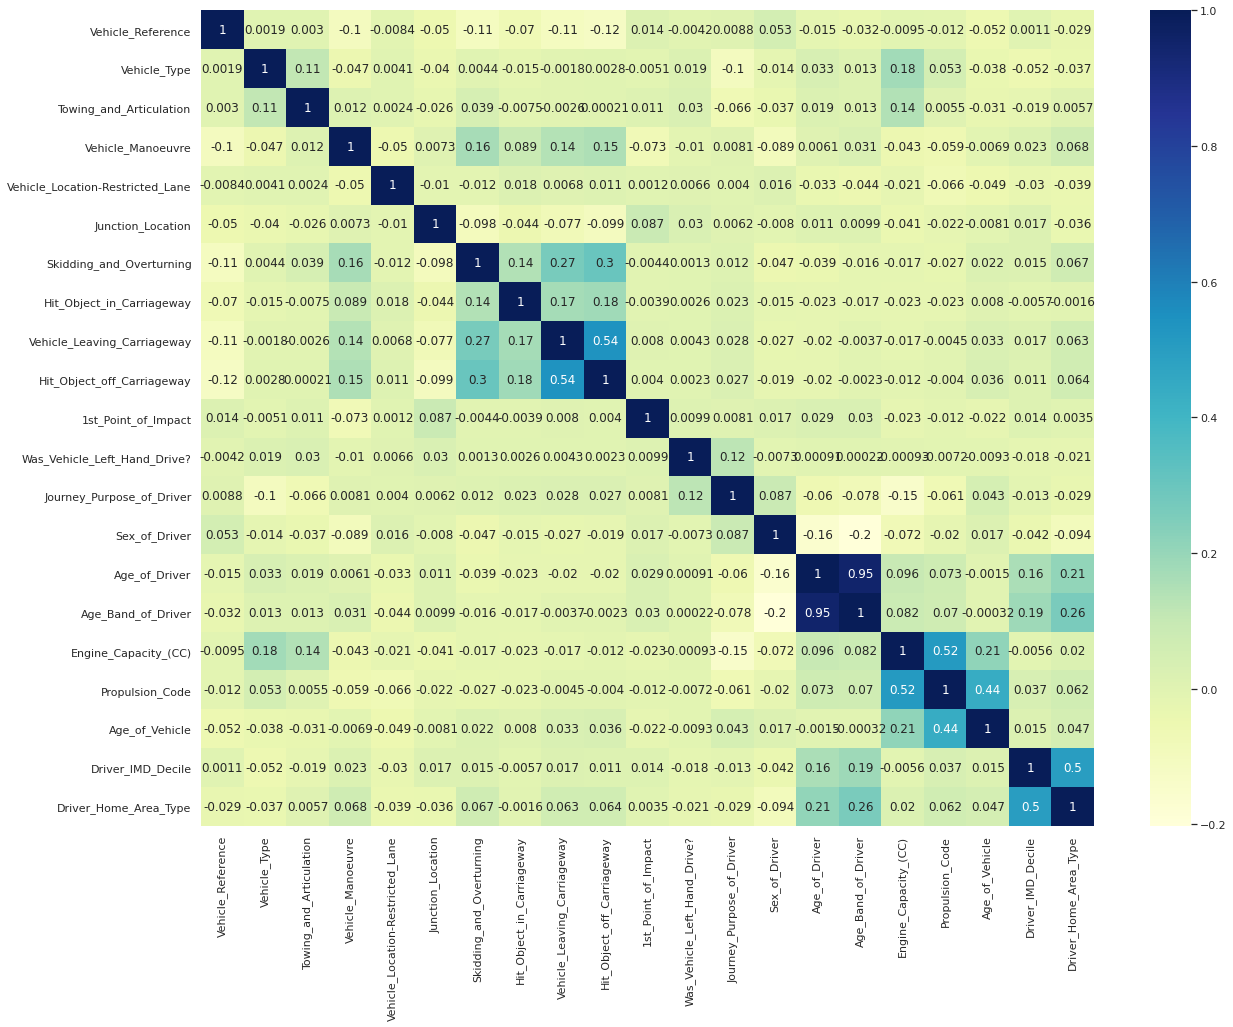

In [52]:
plt.figure(figsize = (20,15))
sns.heatmap(data = Vehicles.corr(),annot = True, cmap = "YlGnBu")
plt.show()

In [53]:
Vehicles["Vehicle_Reference"].sort_values(ascending=True)

Accident_Index
200501BS00001     1
2008440366930     1
2012360065645     1
2008440366633     1
2008440366411     1
                 ..
2013460234852    64
2013460234852    65
2013460234852    66
2013460234852    67
2014450016816    91
Name: Vehicle_Reference, Length: 2756943, dtype: int64

In [54]:
Casualities["Vehicle_Reference"].sort_values(ascending = True)

Accident_Index
200501BS00001     1
201101KF60358     1
201101KF60363     1
201101KF60365     1
201101KF60365     1
                 ..
2013460234852    65
2013460234852    66
2013460234852    67
2014450016816    91
2014450016816    91
Name: Vehicle_Reference, Length: 238882, dtype: int64

In [55]:
#cas_veh_merge = pd.merge(Casualities, Vehicles, how = "outer", on = "Vehicle_Reference")

### **ANALYSIS**

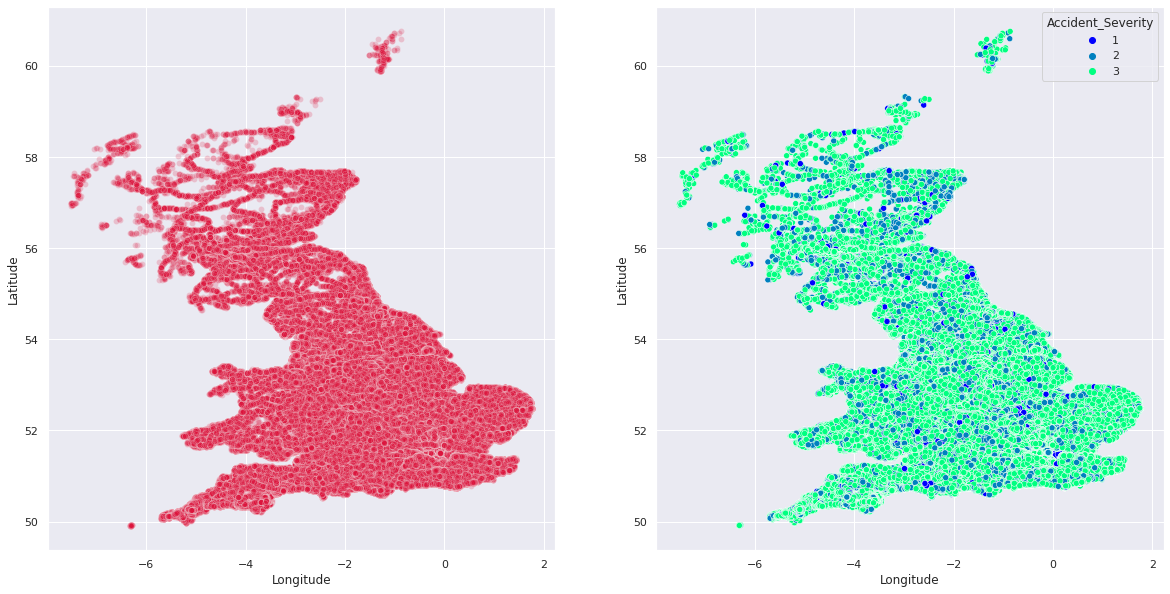

In [56]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=Accidents, x = "Longitude", y = "Latitude", color = "crimson", alpha = 0.2)

plt.subplot(1,2,2)
sns.scatterplot(data=Accidents, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

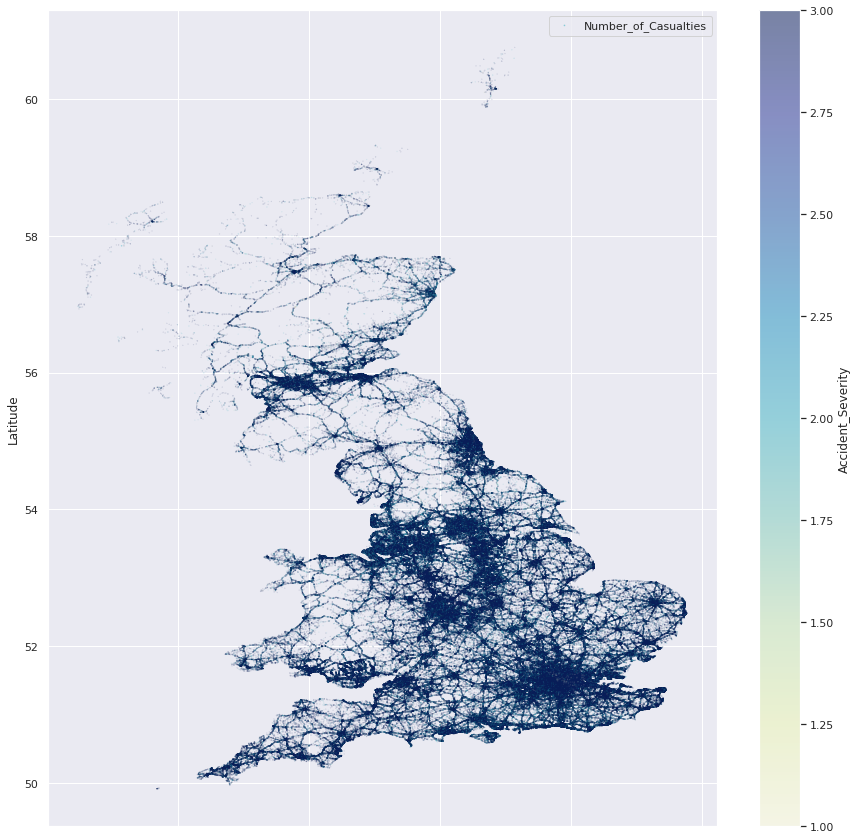

In [57]:
Accidents.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5,
             s = Accidents["Number_of_Casualties"]/100, label = "Number_of_Casualties", figsize=(15,15),
             c = "Accident_Severity", cmap = plt.get_cmap("YlGnBu"), colorbar= True
             )
plt.legend()

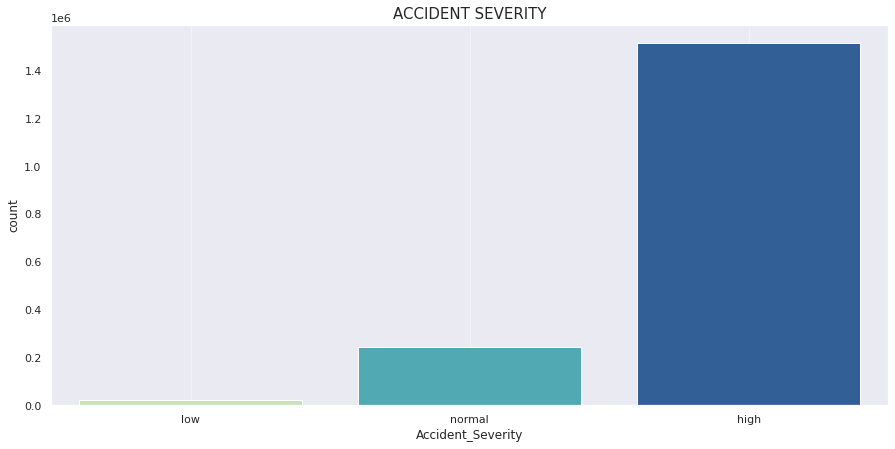

In [58]:
plt.figure(figsize=(15,7))
ax=sns.countplot(Accidents['Accident_Severity'], palette = "YlGnBu")
plt.title('ACCIDENT SEVERITY', fontsize=15)
ax.set_xticklabels(['low','normal','high'])
plt.grid(alpha=0.4)

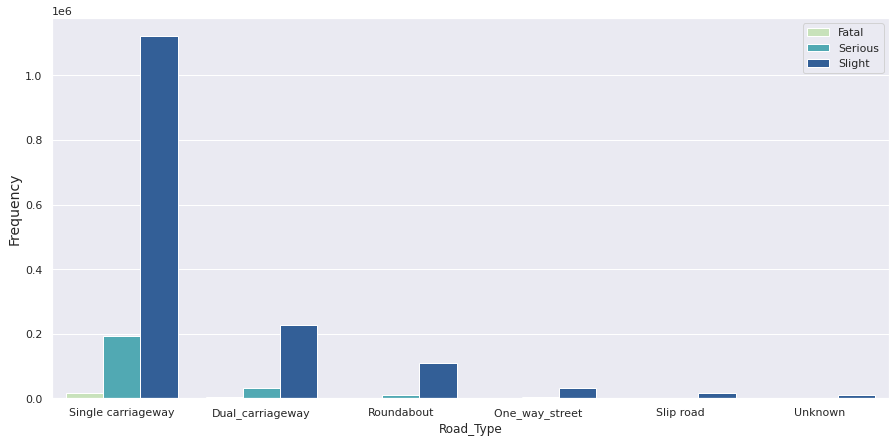

In [59]:
plt.figure(figsize=(15,7))
ax = sns.countplot('Road_Type',hue='Accident_Severity',data=Accidents, 
                   order = Accidents["Road_Type"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['Single carriageway','Dual_carriageway','Roundabout',
                    'One_way_street ',
                    'Slip road','Unknown'])
plt.legend(['Fatal','Serious','Slight'])
plt.ylabel("Frequency", fontsize = 14)
plt.show()

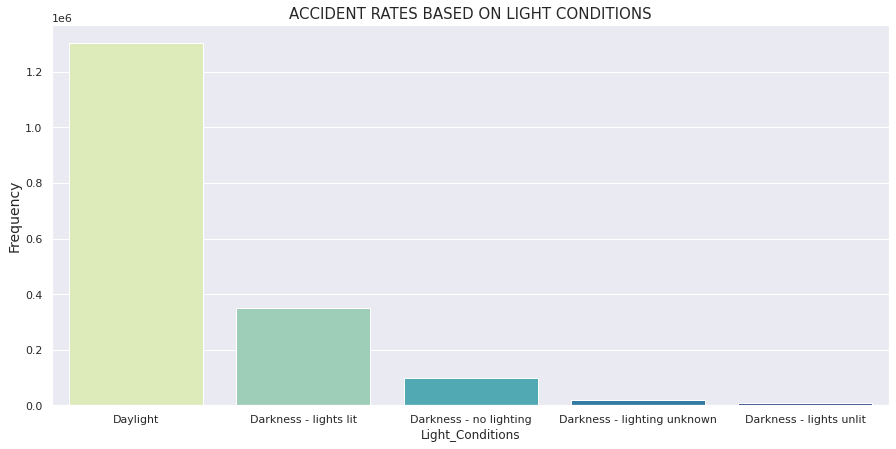

In [60]:
plt.figure(figsize=(15,7))
ax=sns.countplot('Light_Conditions',data=Accidents,
                 order = Accidents["Light_Conditions"].value_counts().index,
                 palette = "YlGnBu") 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - no lighting',
                    'Darkness - lighting unknown',
                    'Darkness - lights unlit'])
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

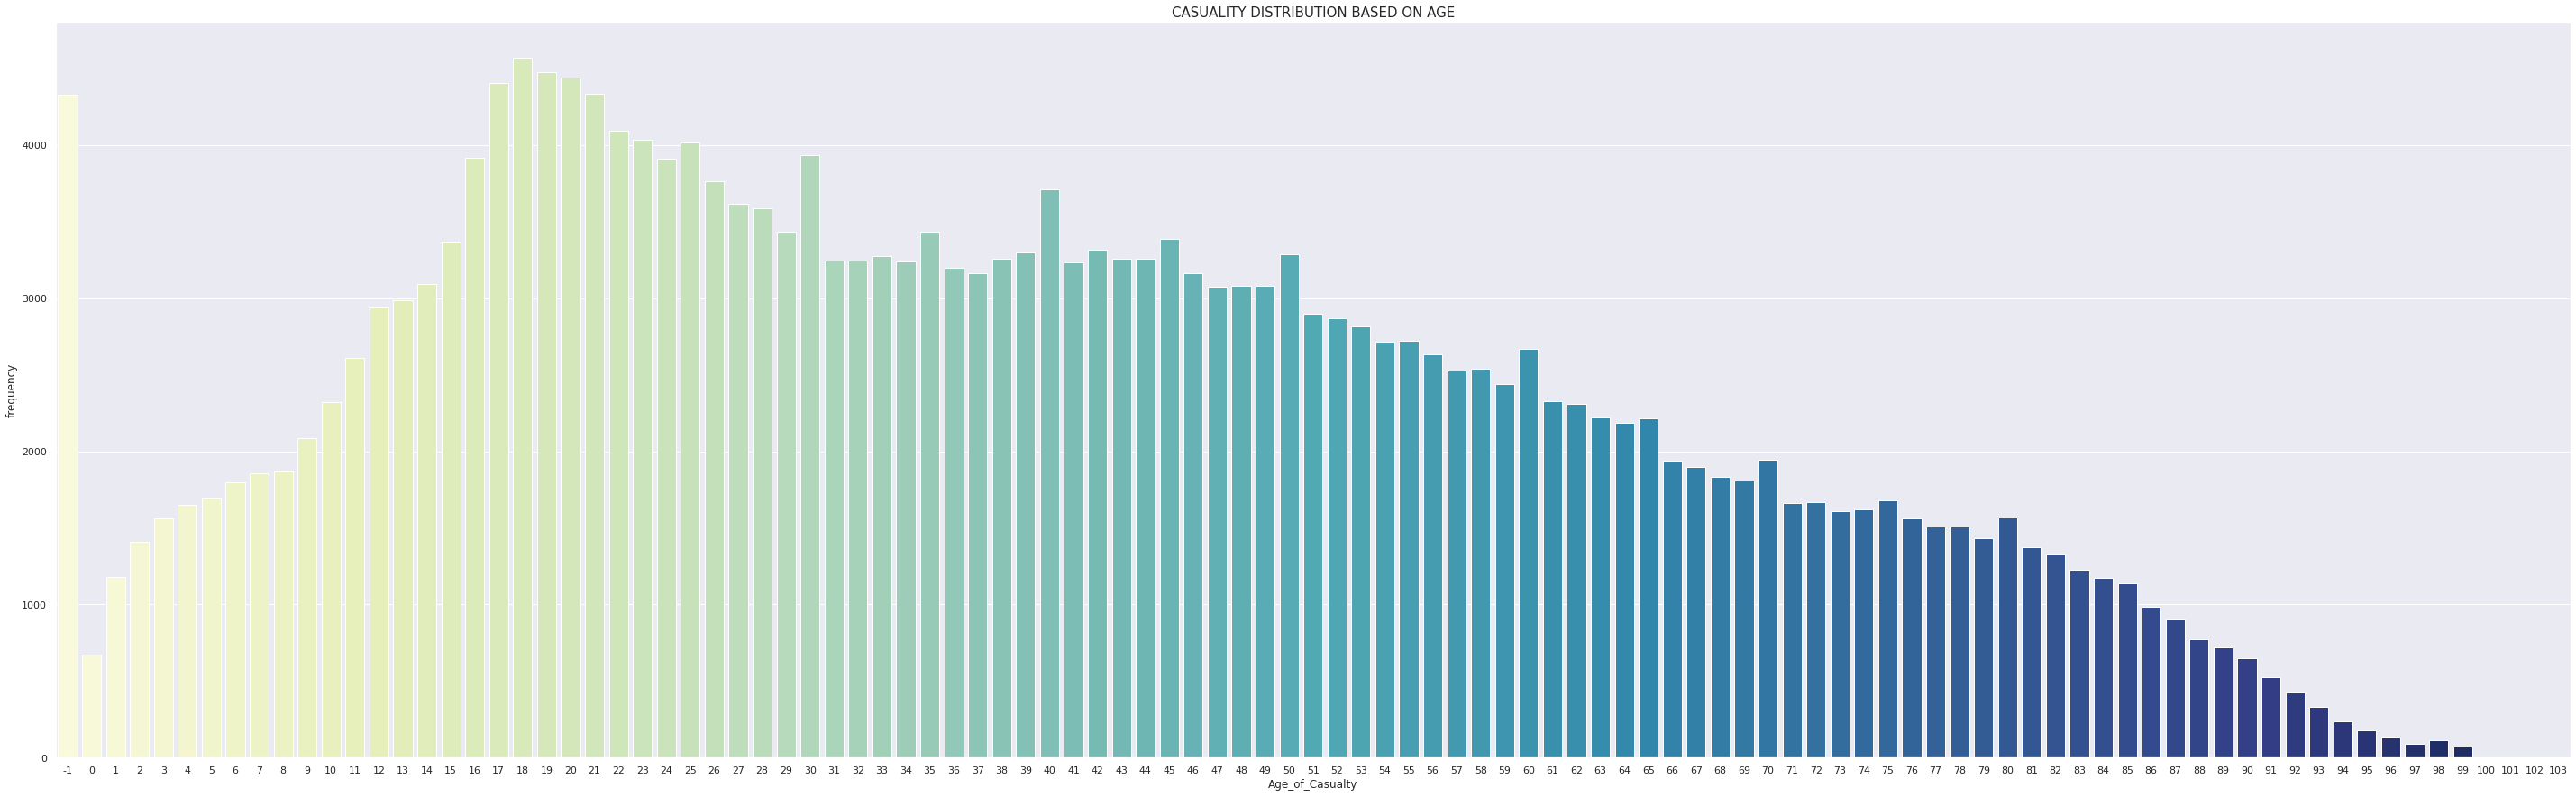

In [61]:
plt.figure(figsize=(50,15))
sns.countplot('Age_of_Casualty',data=Casualities, palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.ylabel("frequency", fontsize = 12)
plt.show()

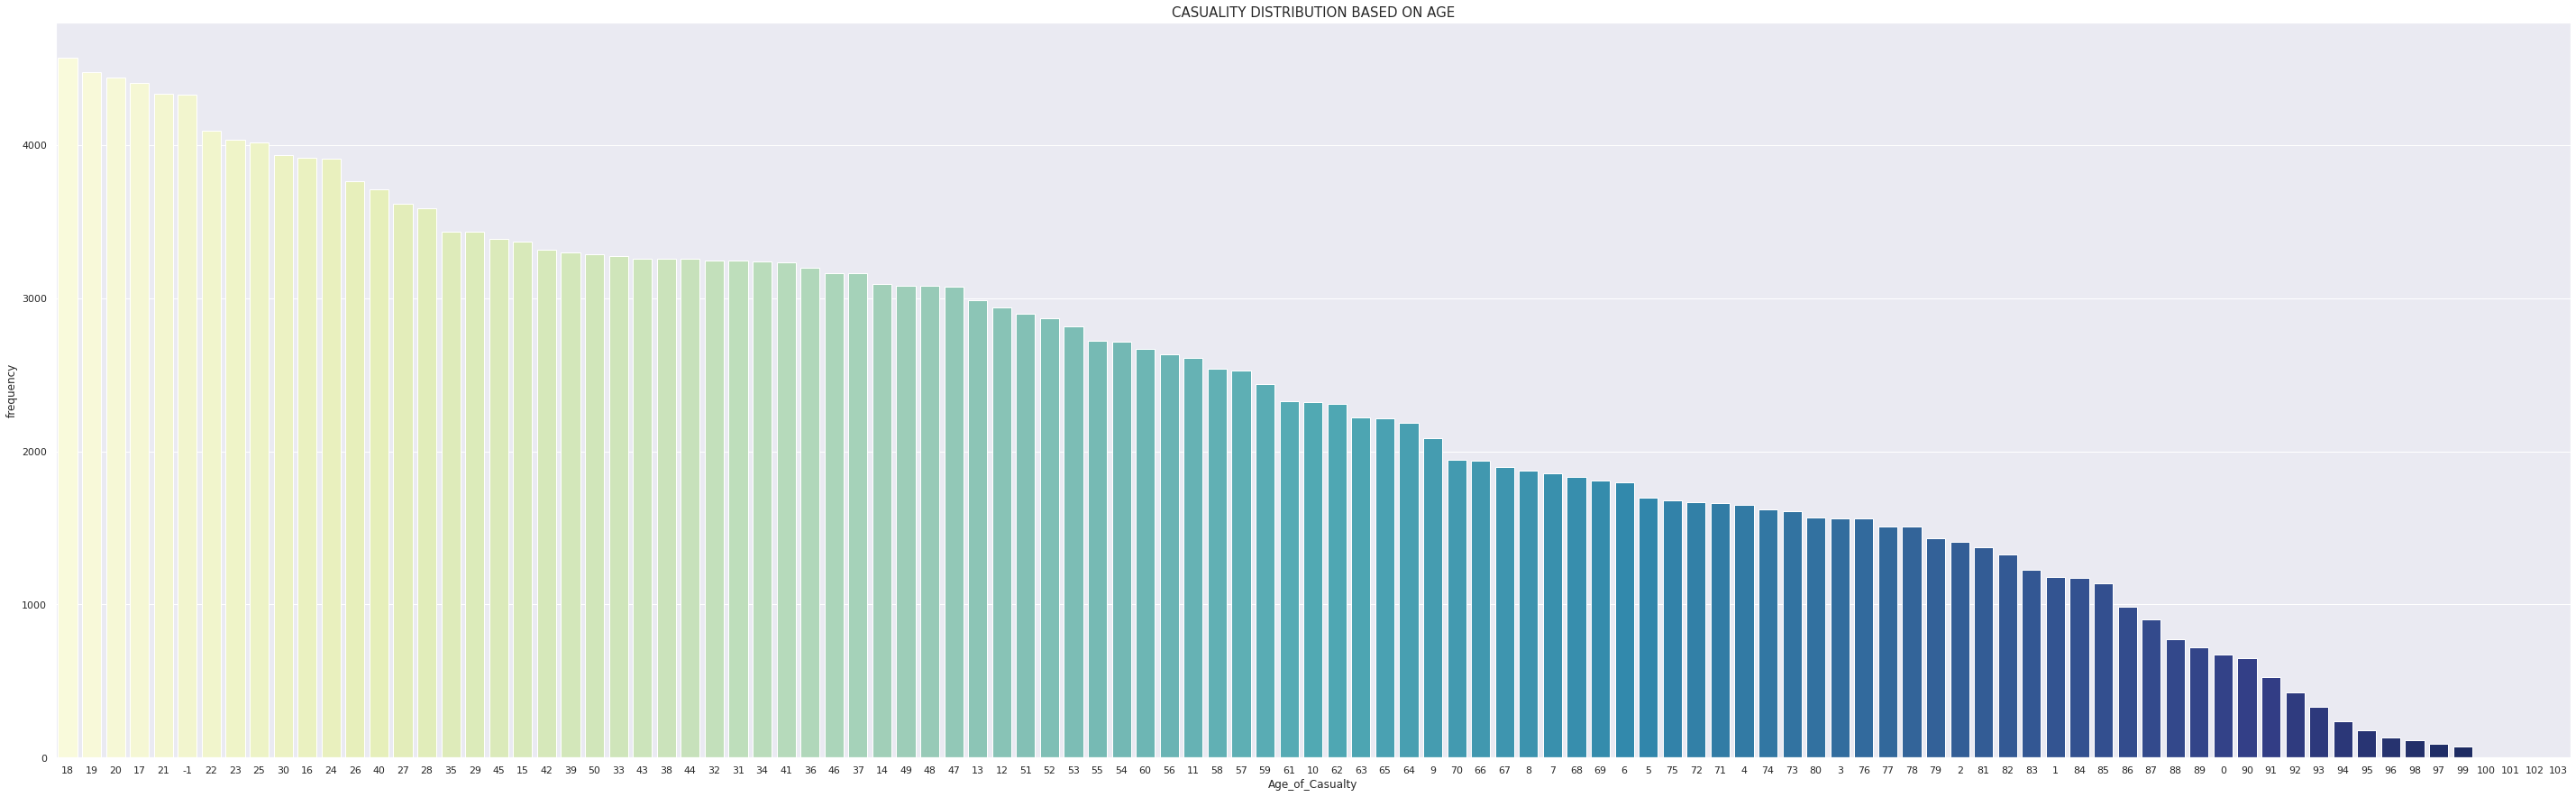

In [62]:
#Distrubution of casualities based on age:
plt.figure(figsize=(50,15))
sns.countplot(x = 'Age_of_Casualty',data=Casualities, 
              order = Casualities["Age_of_Casualty"].value_counts().index, 
              palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.ylabel("frequency", fontsize = 12)
plt.show()

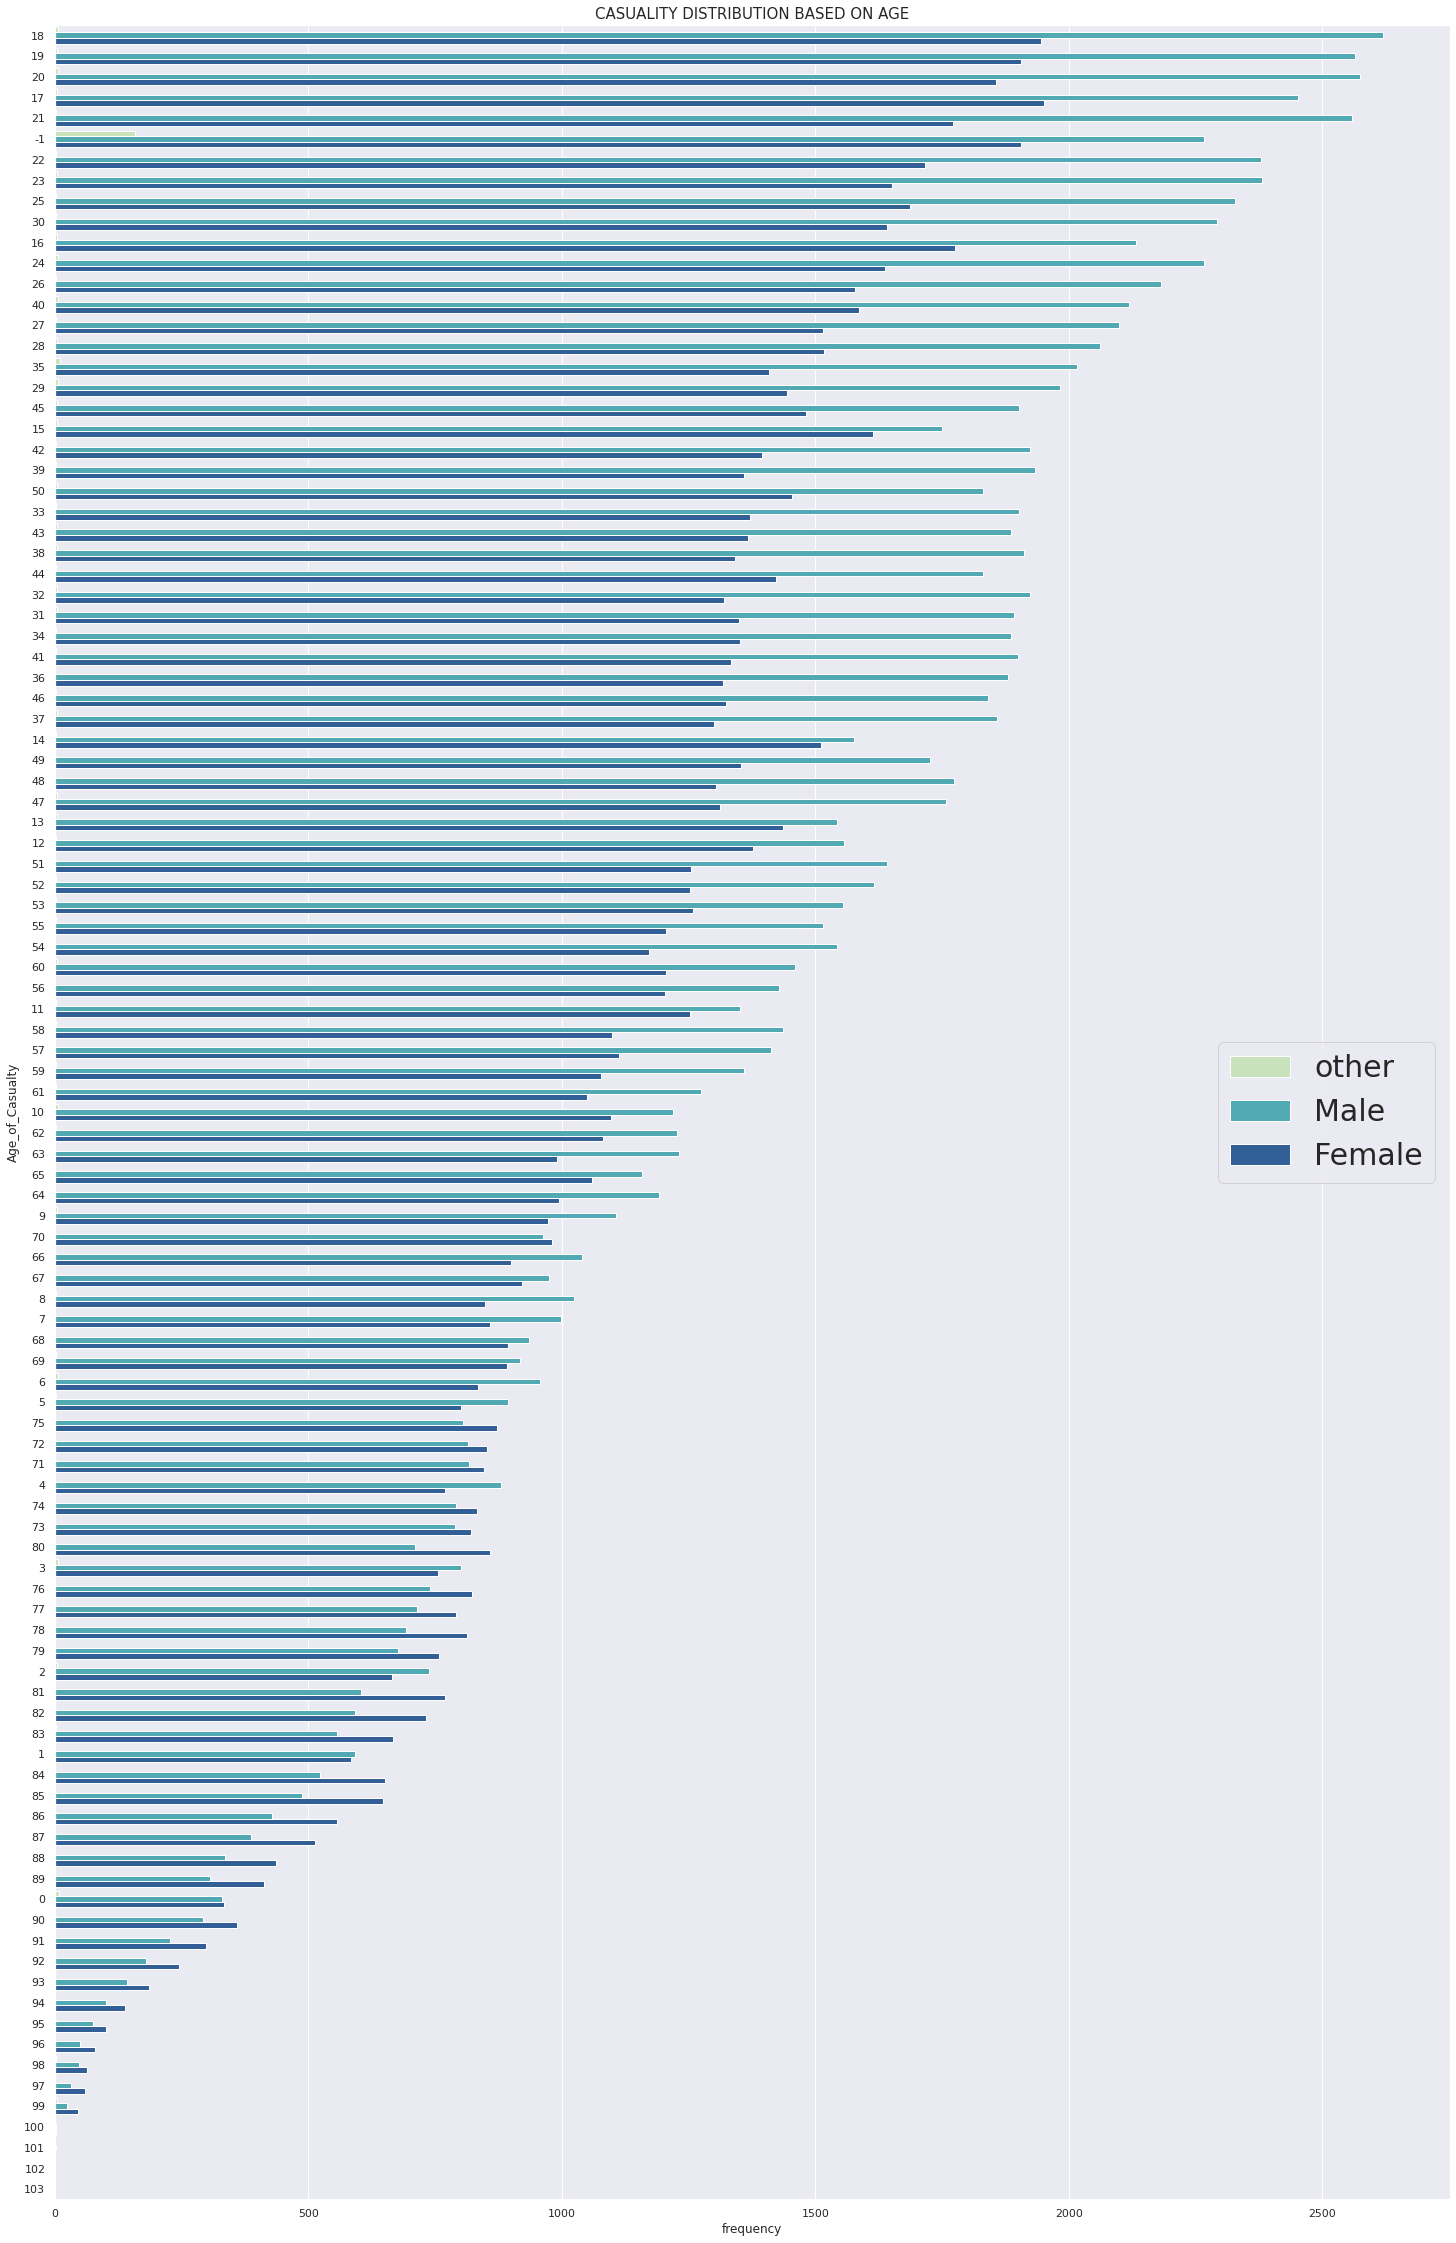

In [63]:
plt.figure(figsize=(25,40))
sns.countplot(y = 'Age_of_Casualty', hue = "Sex_of_Casualty",
              data=Casualities, 
              order = Casualities["Age_of_Casualty"].value_counts().index, 
              palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.legend(['other','Male','Female'],prop={'size': 30}, loc=0)
plt.xlabel("frequency", fontsize = 12)
plt.show()

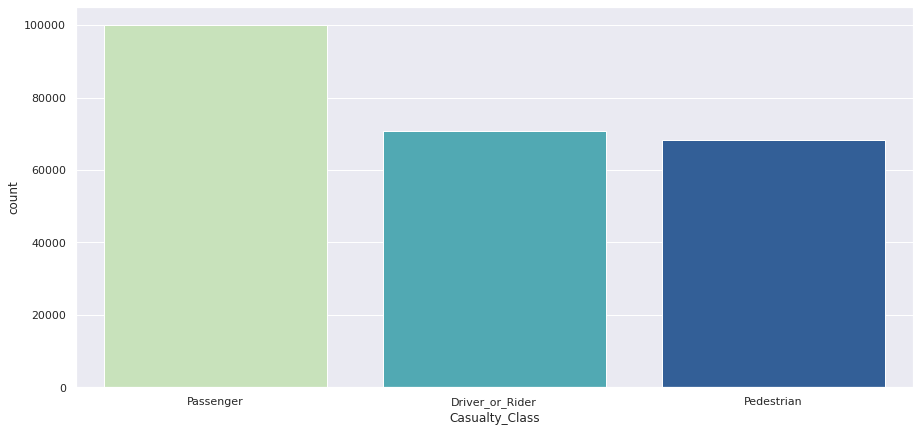

In [64]:
plt.figure(figsize = (15,7))
ax=sns.countplot('Casualty_Class', data=Casualities, palette = "YlGnBu",order = Casualities["Casualty_Class"].value_counts().index)
ax.set_xticklabels(['Passenger','Driver_or_Rider','Pedestrian'])
plt.show()

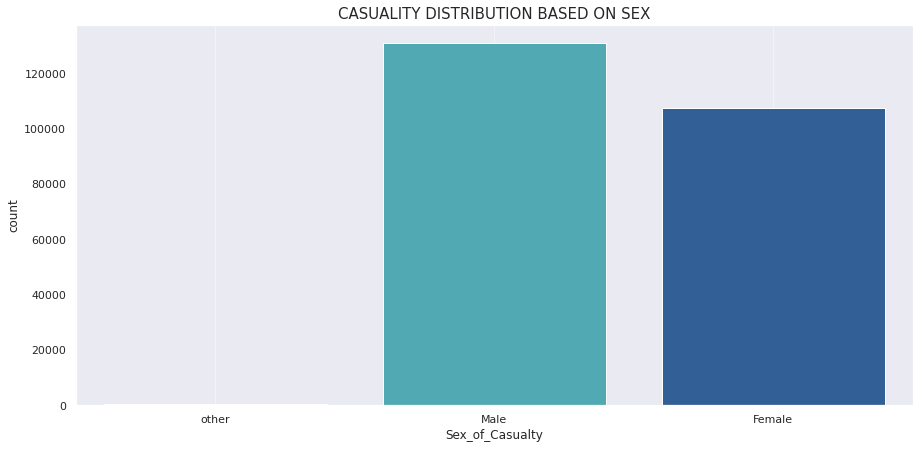

In [65]:
plt.figure(figsize=(15,7))
ax=sns.countplot(Casualities['Sex_of_Casualty'], palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON SEX', fontsize=15)
ax.set_xticklabels(['other','Male','Female'])
plt.grid(alpha=0.4)

### **GEO-ANALYSIS USING GMAPS**

In [66]:
import gmaps

gmaps.configure(api_key = "Use your API key here")

In [67]:
locations = Accidents[["Longitude","Latitude"]]
weights_1 = Accidents["Accident_Severity"]
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights = weights_1))
fig

Figure(layout=FigureLayout(height='420px'))

Note: Try the above gmap code with external notebooks since kaggle notebooks doesn't it.

### **GEO-ANALYSIS USING FOLIUM**

In [ ]:
import folium
from folium.plugins import MarkerCluster

Accidents = Accidents[["Longitude","Latitude","Accident_Severity"]][:].dropna()
locationlist = Accidents[["Longitude","Latitude"]].values.tolist()


m = folium.Map(location=[51.5085300,-0.1257400], tiles='openstreetmap', zoom_start=15)
marker_cluster = MarkerCluster().add_to(m)
for i in range(0,len(locationlist)):
    folium.CircleMarker(locationlist[i],radius = float(Accidents["Accident_Severity"].values[0]/1e7),
                        popup="Accident Severity : %s"%Accidents["Accident_Severity"].values[0],color="red",fill_color='red').add_to(m)
m

Note: Try the above folium code with external notebooks since kaggle notebooks doesn't it.

From the above analyses, it is very much clear that most of the accidents which occured within the provided region comes under the age group of 17-21, and notably most of them are falls under the male category. Furthermore, it clearly shows that most of the accidents are occured in the daylight time at single carriageway. Most of the victims of these car accidents are drivers and most of them are males followed by females

#### ***Thank you for your time...!!***

#### ***Wear Mask and Stay Safe!***